# LAB 2

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, FactorAnalysis
from time import time

## Загрузка данных

In [2]:
df = pd.read_csv('data/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
var_names = list(df.columns) #получение имен признаков
labels = df.to_numpy('int')[:,-1] #метки классов
data = df.to_numpy('float')[:,:-1] #описательные признаки

In [4]:
cm.hsv(np.unique(labels))[:,1]

array([0.02316179, 0.04632358, 0.06948536, 0.11580894, 0.13897073,
       0.16213252])

In [5]:
data = preprocessing.minmax_scale(data)
print(data)

[[0.43283582 0.43759398 1.         ... 0.30855019 0.         0.        ]
 [0.28358209 0.47518797 0.80178174 ... 0.22304833 0.         0.        ]
 [0.22080773 0.42105263 0.79064588 ... 0.21840149 0.         0.        ]
 ...
 [0.41703248 0.54586466 0.         ... 0.27973978 0.52063492 0.        ]
 [0.23529412 0.54887218 0.         ... 0.28345725 0.4984127  0.        ]
 [0.26163301 0.52631579 0.         ... 0.2964684  0.53015873 0.        ]]


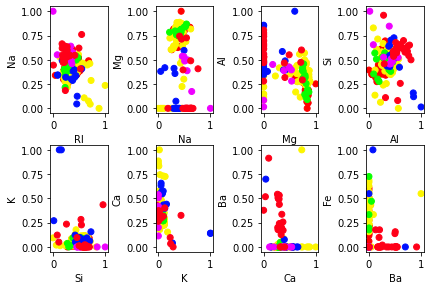

In [6]:
fig, axs = plt.subplots(2,4)
plt.tight_layout()

for i in range(data.shape[1]-1):
    axs[i//4, i%4].scatter(data[:, i], data[:,(i+1)], c=labels, cmap='hsv')

    axs[i//4, i%4].set_xlabel(var_names[i])
    axs[i//4, i%4].set_ylabel(var_names[i+1])

plt.show()

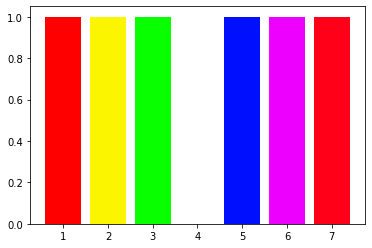

In [7]:
my_cmap = cm.get_cmap('hsv')
my_norm = Normalize(vmin=np.min(np.unique(labels)),
                    vmax=np.max(np.unique(labels)))

plt.bar(np.unique(labels), 1, color=my_cmap(my_norm(np.unique(labels))))
plt.show()

HSV
* красный - 1
* желтый - 2
* зеленый - 3
* голубой - 4 (не используется)
* синий - 5
* фиолетовый - 6
* красный - 7

## Методы главных компонент

In [8]:
pca = PCA(n_components = 2)
pca_data = pca.fit(data).transform(data)

In [9]:
print(pca.explained_variance_ratio_)
print(f"при {pca.n_components} объяснено {np.sum(pca.explained_variance_ratio_)}")
print(pca.singular_values_)

[0.45429569 0.17990097]
при 2 объяснено 0.6341966621042778
[5.1049308  3.21245688]


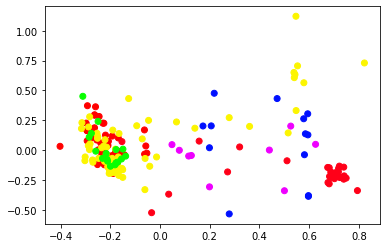

In [10]:
plt.tight_layout()
plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='hsv')
plt.show()

Произошло уменьшение размерности данных до 2

In [11]:
pca_test = PCA(n_components = 4)
pca_test_data = pca_test.fit(data).transform(data)

In [12]:
print(pca_test.explained_variance_ratio_)
print(pca_test.singular_values_)

[0.45429569 0.17990097 0.12649459 0.09797847]
[5.1049308  3.21245688 2.69374532 2.3707507 ]


In [13]:
print(f"при {pca_test.n_components} объяснено {np.sum(pca_test.explained_variance_ratio_)}")

при 4 объяснено 0.8586697305102717


In [14]:
prev_data = pca.inverse_transform(pca_data)
prev_data

array([[ 0.31977525,  0.35177682,  0.95959031, ...,  0.28753884,
        -0.05709635,  0.15446576],
       [ 0.23541229,  0.40864647,  0.80238844, ...,  0.22601248,
         0.02429236,  0.05797254],
       [ 0.21027814,  0.42056458,  0.79216838, ...,  0.20331592,
         0.03725491,  0.03325719],
       ...,
       [ 0.26940681,  0.51246805, -0.05774794, ...,  0.36092437,
         0.27613283, -0.00485705],
       [ 0.22418866,  0.52801956, -0.03321633, ...,  0.31497387,
         0.28622509, -0.04459475],
       [ 0.23188077,  0.52718286, -0.05056928, ...,  0.32436217,
         0.28857059, -0.03928655]])

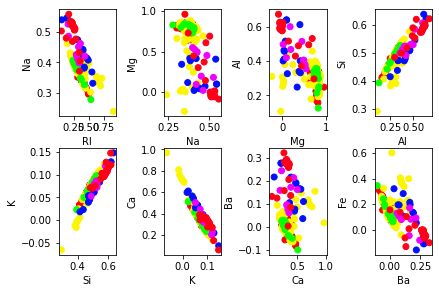

In [15]:
fig, axs = plt.subplots(2,4)
plt.tight_layout()

for i in range(data.shape[1]-1):
    axs[i//4, i%4].scatter(prev_data[:, i], prev_data[:,(i+1)], c=labels, cmap='hsv')

    axs[i//4, i%4].set_xlabel(var_names[i])
    axs[i//4, i%4].set_ylabel(var_names[i+1])

plt.show()

Как говорилось ранее, было объяснено только 60% данных, поэтому на графиках
мы наблюдаем потери.


In [16]:
for n in range(2, 9):
    st = time()
    pca = PCA(n_components = n, svd_solver="auto").fit(data)
    print(f"auto:\t\t при {pca.n_components} объяснено {np.sum(pca.explained_variance_ratio_)} за {time() - st}")
    st = time()
    pca = PCA(n_components = n, svd_solver="full").fit(data)
    print(f"full:\t\t при {pca.n_components} объяснено {np.sum(pca.explained_variance_ratio_)} за {time() - st}")
    st = time()
    pca = PCA(n_components = n, svd_solver="arpack").fit(data)
    print(f"arpack:\t\t при {pca.n_components} объяснено {np.sum(pca.explained_variance_ratio_)} за {time() - st}")
    st = time()
    pca = PCA(n_components = n, svd_solver="randomized").fit(data)
    print(f"randomize:\t при {pca.n_components} объяснено {np.sum(pca.explained_variance_ratio_)} за {time() - st}")

    print()

auto:		 при 2 объяснено 0.6341966621042778 за 0.001224517822265625
full:		 при 2 объяснено 0.6341966621042778 за 0.0006072521209716797
arpack:		 при 2 объяснено 0.6341966621042783 за 0.0020923614501953125
randomize:	 при 2 объяснено 0.6341966621042776 за 0.001979351043701172

auto:		 при 3 объяснено 0.7606912558548662 за 0.0008490085601806641
full:		 при 3 объяснено 0.7606912558548662 за 0.0007047653198242188
arpack:		 при 3 объяснено 0.7606912558548664 за 0.0017137527465820312
randomize:	 при 3 объяснено 0.7606912558548664 за 0.002819538116455078

auto:		 при 4 объяснено 0.8586697305102717 за 0.000858306884765625
full:		 при 4 объяснено 0.8586697305102717 за 0.0007014274597167969
arpack:		 при 4 объяснено 0.8586697305102717 за 0.0017747879028320312
randomize:	 при 4 объяснено 0.8586697305102723 за 0.0020341873168945312

auto:		 при 5 объяснено 0.9272937149511479 за 0.0008025169372558594
full:		 при 5 объяснено 0.9272937149511479 за 0.0007104873657226562
arpack:		 при 5 объяснено 0.927

### Модификация метода главных компонент

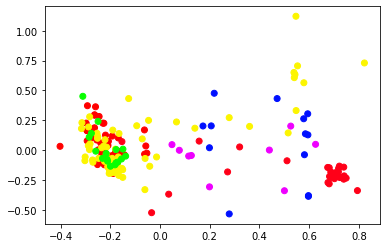

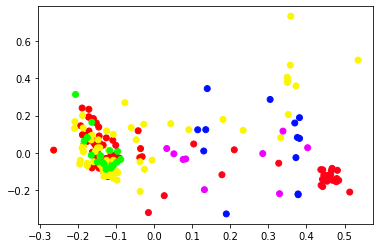

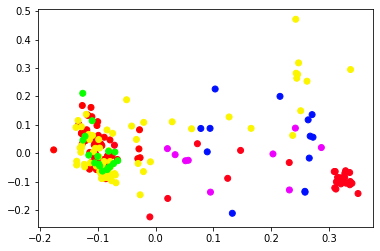

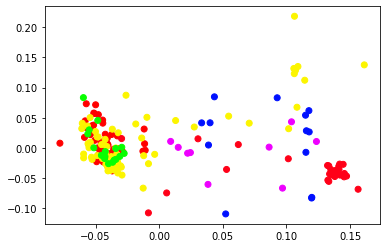

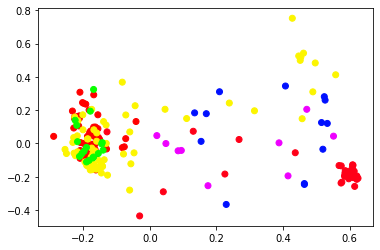

In [17]:
kernels = ["linear", "poly", "rbf", "sigmoid", "cosine"]

plt.tight_layout()

for i in range(len(kernels)):
    kpca = KernelPCA(n_components=2, kernel=kernels[i])
    kpca_data = kpca.fit(data).transform(data)

    plt.scatter(kpca_data[:,0],kpca_data[:,1],c=labels,cmap='hsv')
    plt.show()

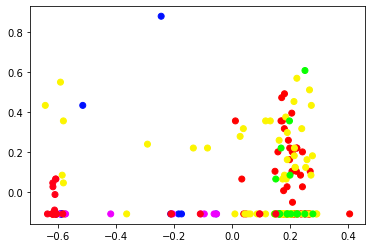

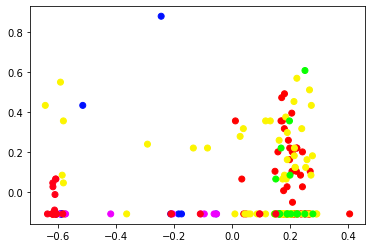

In [18]:
methods = ["lars", "cd"]

plt.tight_layout()

for i in range(len(methods)):
    spca = SparsePCA(n_components=2, method=methods[i])
    spca_data = spca.fit(data).transform(data)

    plt.scatter(spca_data[:,0],spca_data[:,1],c=labels,cmap='hsv')
    plt.show()

In [19]:
methods = ["lars", "cd"]
for n in range(2, 9):
    for method in methods:
        st = time()
        spca = SparsePCA(n_components=n, method=method).fit(data)
        print(f"{method}:\t\t при {n} за {time() - st}")
    print()


lars:		 при 2 за 0.019983768463134766
cd:		 при 2 за 0.008373498916625977

lars:		 при 3 за 0.026273727416992188
cd:		 при 3 за 0.010392904281616211

lars:		 при 4 за 0.027945756912231445
cd:		 при 4 за 0.010955095291137695

lars:		 при 5 за 0.03150606155395508
cd:		 при 5 за 0.01063227653503418

lars:		 при 6 за 0.08722710609436035
cd:		 при 6 за 0.03207659721374512

lars:		 при 7 за 0.08674788475036621
cd:		 при 7 за 0.03218340873718262

lars:		 при 8 за 0.09748959541320801
cd:		 при 8 за 0.03393673896789551



### Факторный анализ

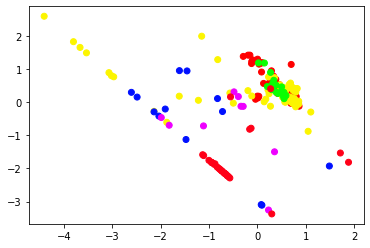

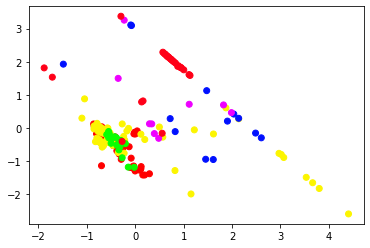

In [20]:
methods = ["lapack", "randomized"]

plt.tight_layout()

for i in range(len(methods)):
    fact_analysis = FactorAnalysis(n_components=2, svd_method=methods[i])
    fact_data = fact_analysis.fit(data).transform(data)

    plt.scatter(fact_data[:,0],fact_data[:,1],c=labels,cmap='hsv')
    plt.show()